In [50]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib as mpl
import joblib
import os
import keras
# tensorflow 용 시간체크와 tqdm
!pip install tensorflow-addons
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

#### Openai gym 부터 시작

In [ ]:
import gym
gym.envs.registry.all()

#### Cart-Pole

In [ ]:
# catpole 설치
env = gym.make("CartPole-v1")

In [6]:
# 환경 초기화
obs = env.reset()
obs

array([ 0.04636808, -0.01319869,  0.00437193,  0.00376444], dtype=float32)

In [ ]:
# !pip install -U pyvirtualdisplay
pip install xvfb

In [18]:
# 파이썬 화면 가상환경
import pyvirtualdisplay

In [19]:
env.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [20]:
# 환경 이미지를 np 배열로 로드
img = env.render(mode="rgb_array")
img.shape

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


(400, 600, 3)

In [21]:
# 이미지 변환 함수 정의
def plot_environment(env, figsize = (5,4)):
  plt.figure(figsize=figsize)
  img = env.render(mode="rgb_array")
  plt.imshow(img)
  plt.axis("off")
  return img

<function matplotlib.pyplot.show(close=None, block=None)>

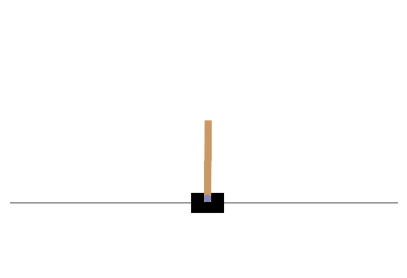

In [22]:
# 카트 이미지 표시
plot_environment(env)
plt.show

In [27]:
# 행동할 수 있는 종류
env.action_space

Discrete(2)

In [36]:
# 카트 오른쪽으로 가속
action = 1
obs, reward, done, info = env.step(action)
obs

array([ 0.06872086,  0.7673535 , -0.03031787, -1.1686105 ], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

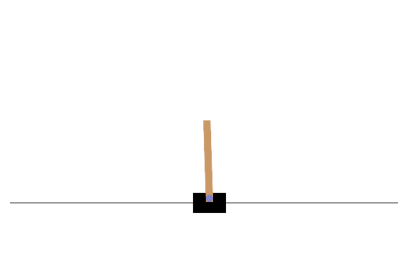

In [37]:
# 카트 이미지 표시
plot_environment(env)
plt.show

In [38]:
# 리워드 표시
reward

1.0

In [40]:
done, info

(False, {})

In [41]:
# 1 step 시퀸스 = episode
# 에피소드 끝에서 계속하기 전에 환경은 reset
if done:
  obs = env.reset()

#### 간단한 정책

In [42]:
# 간단한 정책
# 막대가 왼쪽으로 가면 오른쪽으로 카트 이동
# 막대가 오른쪽으로 가면 왼쪽으로 카트 이동
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle <0 else 1
totals = []

In [43]:
for episode in range(500):
  episode_rewards = 0
  obs = env.reset()
  for step in range(200):
    action = basic_policy(obs)
    obs, reward, done, info = env.step(action)
    episode_rewards += reward
    if done:
      break
  totals.append(episode_rewards)

In [46]:
totals[:5]

[59.0, 37.0, 27.0, 45.0, 35.0]

In [56]:
# 시각화
frames=[]
obs = env.reset()
for step in range(200):
  img = env.render(mode="rgb_array")
  frames.append(img)
  action = basic_policy(obs)

  obs, reward, done, info = env.step(action)
  if done:
    break
# 출력
def update_scene(num, frames, patch):
  patch.set_data(frames[num])
  return patch,

def plot_animation(frames, repeat = False, interval=40):
  fig = plt.figure()
  patch = plt.imshow(frames[0])
  plt.axis('off')
  anim = animation.FuncAnimation(
      fig, update_scene, fargs=(frames, patch),
      frames = len(frames), repeat=repeat, interval = interval
  )
  plt.close()
  return anim
plot_animation(frames)

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
